import necessary libraries

In [17]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
# Read the data

df = pd.read_csv("Mall_Customers.csv")

In [55]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


explore the data

In [56]:
df.shape

(200, 5)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [58]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [59]:
# Checking for duplicate values

df.duplicated().sum()

0

Choosing the annual income and spending score column 

In [60]:
X = df.iloc[:, [3,4]].values

In [62]:
X[:10]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72]], dtype=int64)

Chosing the number of clusters


In [63]:
# finding WCSS value for different number of clusters

wcss = []
n = 11
for j in range (1,n) :
    kmean_module = KMeans(n_clusters = j, random_state = 42)
    kmean_module.fit(X)
    wcss.append(kmean_module.inertia_)
    
    

Text(0.5, 1.0, 'elbow graph')

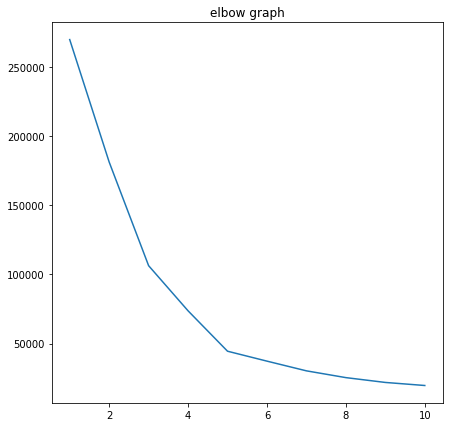

In [64]:
# plotting elbow graph


fig , ax = plt.subplots(figsize = (7,7))
plt.plot(range(1,n), wcss)
plt.title("elbow graph")

optimum number of clusters is 5

In [77]:
# trainng the k-means model
kmean_module = KMeans(n_clusters = 5, random_state = 0)
kmean_module.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [78]:
# find the label for each data point 
y = kmean_module.predict(X)
y

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [83]:
# finding the cluster centers

centers = kmean_module.cluster_centers_

visualize all the clusters and the centers

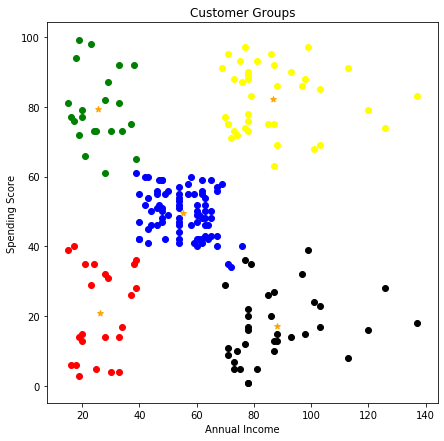

In [98]:
fig , ax = plt.subplots(figsize = (7,7))
plt.scatter(X[y==0,0], X[y==0,1], c = "blue")
plt.scatter(X[y == 1,0], X[y==1,1], c = "green")
plt.scatter(X[y == 2,0], X[y==2,1], c = "yellow")
plt.scatter(X[y == 3,0], X[y==3,1], c = "red")
plt.scatter(X[y == 4,0], X[y==4,1], c = "black")

plt.scatter(centers[:, 0], centers[:, 1], c = "orange" , marker = "*")
plt.title("Customer Groups")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")



plt.show()



